In [1]:
import numpy as np
import pandas as pd

import cassiopeia as cas

In [132]:
allele_table = pd.read_csv("/media/chang/HDD-6/chang/mg/mg_lib_20220324/P4_3/allele_table.csv", index_col=0)
allele_table

,cellBC,intBC,allele,r1,r2,r3,lineageGrp,UMI,readCount
0,AAAGTGACATCCGTGG,CCCGAGGTCATGGC,CCGAA[None]AAATG,CCGAA[None]AAATG,NaN,NaN,2,9,60204
1,AAAGTGACATCCGTGG,CGGTCCAAAAGAAT,CCGAA[113:4I]TTTAAAATGTAACG[163:8D]GGTTCAATCG[...,CCGAA[113:4I]TTTAAAATG,TAACG[163:8D]GGTTC,AATCG[221:2D]GAGGA,2,13,134488
2,AACGAAATCTGCTTAT,CATCCGGTCCTTCA,CCGAA[None]AAATGGATAT[None]CTCTGATTCG[None]CGGAG,CCGAA[None]AAATG,GATAT[None]CTCTG,ATTCG[None]CGGAG,1,1,12960
3,AACGAAATCTGCTTAT,GTTAATGAGAAATT,CGAAT[114:1I]GAATGGCGATA[166:1D]CTCTGATTCG[Non...,CGAAT[114:1I]GAATGG,CGATA[166:1D]CTCTG,ATTCG[None]CGGAG,1,9,61446
4,AACGAAATCTGCTTAT,TATCCAGCATTCTG,AAAAA[116:1I]ATGGCCGATAT[None]CTCTGATTCG[221:2...,AAAAA[116:1I]ATGGCC,GATAT[None]CTCTG,ATTCG[221:2D]GAGGA,1,1,3814
...,...,...,...,...,...,...,...,...,...
270,TGTGTGAGTCCGAAGA,TTCACTTCTCACGC,GTCCT[101:34D]CGGCAGTCAT[159:19D]CCGTGAGGAG[21...,GTCCT[101:34D]CGGCA,GTCAT[159:19D]CCGTG,AGGAG[210:16D]GACAA,1,13,100792
278,TTACCGCAGTGCGACA,GTTAATGAGAAATT,CCGAA[None]AAATGGTTGG[154:19D]TTCATATTCG[None]...,CCGAA[None]AAATG,GTTGG[154:19D]TTCAT,ATTCG[None]CGGAG,1,12,91861
289,TTTCGATTCGAGCTGC,CATCCGGTCCTTCA,AAAAA[116:1I]ATGGCCGATAT[None]CTCTGATTCG[None]...,AAAAA[116:1I]ATGGCC,GATAT[None]CTCTG,ATTCG[None]CGGAG,1,1,10059
290,TTTCGATTCGAGCTGC,GTTAATGAGAAATT,CCGAA[None]AAATGGATAT[None]CTCTGATTCG[None]CGGAG,CCGAA[None]AAATG,GATAT[None]CTCTG,ATTCG[None]CGGAG,1,4,31458


In [133]:
allele_table.intBC.unique()

array(['CCCGAGGTCATGGC', 'CGGTCCAAAAGAAT', 'CATCCGGTCCTTCA',
       'GTTAATGAGAAATT', 'TATCCAGCATTCTG', 'CATTTATCACCTGA',
       'TTCACTTCTCACGC', 'ATAGTCGCCCACTC'], dtype=object)

In [134]:
sc = pd.read_csv("/media/chang/HDD-6/chang/mg/mg_lib_20220324/P31_3/sc_meta.csv", index_col=0)

In [135]:
sc['cellBC'] = sc.index
sc[['cellBC','clusters']]

,cellBC,clusters
AAACCCAAGGCACAAC,AAACCCAAGGCACAAC,MRC1
AAACCCACAGGCATGA,AAACCCACAGGCATGA,MRC1
AAACCCAGTATCCCTC,AAACCCAGTATCCCTC,P2RY12
AAACCCAGTCAAGCGA,AAACCCAGTCAAGCGA,P2RY12
AAACCCAGTGTAGGAC,AAACCCAGTGTAGGAC,P2RY12
...,...,...
TTTGTTGAGTTCTCTT,TTTGTTGAGTTCTCTT,P2RY12
TTTGTTGCAAATCAAG,TTTGTTGCAAATCAAG,P2RY12
TTTGTTGGTATCGCTA,TTTGTTGGTATCGCTA,P2RY12
TTTGTTGTCAAAGCCT,TTTGTTGTCAAAGCCT,P2RY12


In [136]:
merged = pd.merge(allele_table, sc[['cellBC','clusters']])
#merged = merged[merged['clusters'].isin(["MRC1", "P2RY12","TREM2"])]
merged

,cellBC,intBC,allele,r1,r2,r3,lineageGrp,UMI,readCount,clusters
0,AAAGTGACATCCGTGG,CCCGAGGTCATGGC,CCGAA[None]AAATG,CCGAA[None]AAATG,NaN,NaN,2,9,60204,LYZ
1,AAAGTGACATCCGTGG,CGGTCCAAAAGAAT,CCGAA[113:4I]TTTAAAATGTAACG[163:8D]GGTTCAATCG[...,CCGAA[113:4I]TTTAAAATG,TAACG[163:8D]GGTTC,AATCG[221:2D]GAGGA,2,13,134488,LYZ
2,AACGAAATCTGCTTAT,CATCCGGTCCTTCA,CCGAA[None]AAATGGATAT[None]CTCTGATTCG[None]CGGAG,CCGAA[None]AAATG,GATAT[None]CTCTG,ATTCG[None]CGGAG,1,1,12960,P2RY12
3,AACGAAATCTGCTTAT,GTTAATGAGAAATT,CGAAT[114:1I]GAATGGCGATA[166:1D]CTCTGATTCG[Non...,CGAAT[114:1I]GAATGG,CGATA[166:1D]CTCTG,ATTCG[None]CGGAG,1,9,61446,P2RY12
4,AACGAAATCTGCTTAT,TATCCAGCATTCTG,AAAAA[116:1I]ATGGCCGATAT[None]CTCTGATTCG[221:2...,AAAAA[116:1I]ATGGCC,GATAT[None]CTCTG,ATTCG[221:2D]GAGGA,1,1,3814,P2RY12
...,...,...,...,...,...,...,...,...,...,...
178,TGTGTGAGTCCGAAGA,TTCACTTCTCACGC,GTCCT[101:34D]CGGCAGTCAT[159:19D]CCGTGAGGAG[21...,GTCCT[101:34D]CGGCA,GTCAT[159:19D]CCGTG,AGGAG[210:16D]GACAA,1,13,100792,P2RY12
179,TTACCGCAGTGCGACA,GTTAATGAGAAATT,CCGAA[None]AAATGGTTGG[154:19D]TTCATATTCG[None]...,CCGAA[None]AAATG,GTTGG[154:19D]TTCAT,ATTCG[None]CGGAG,1,12,91861,P2RY12
180,TTTCGATTCGAGCTGC,CATCCGGTCCTTCA,AAAAA[116:1I]ATGGCCGATAT[None]CTCTGATTCG[None]...,AAAAA[116:1I]ATGGCC,GATAT[None]CTCTG,ATTCG[None]CGGAG,1,1,10059,P2RY12
181,TTTCGATTCGAGCTGC,GTTAATGAGAAATT,CCGAA[None]AAATGGATAT[None]CTCTGATTCG[None]CGGAG,CCGAA[None]AAATG,GATAT[None]CTCTG,ATTCG[None]CGGAG,1,4,31458,P2RY12


In [137]:
df = pd.DataFrame(0, columns=pd.unique(merged['cellBC']), index=pd.unique(merged['allele']))
umi = set()
for row in merged.itertuples():
    if row.UMI not in umi:
        df.at[row.allele, row.cellBC] += 1
        umi.add(row.UMI)
df.to_csv("/media/chang/HDD-6/chang/mg/mg_lib_20220324/P4_1/allele_matrix.csv")
df

,AAAGTGACATCCGTGG,AACGAAATCTGCTTAT,AACGGGAGTTGCGTAT,AAGACAATCGATTGGT,AAGCGAGAGAGAGTTT,AAGGAATGTTCATCTT,ACCATTTTCGAGCCTG,ACCTACCGTGCGGTAA,AGAGCAGCAAGTTCCA,AGCGCTGGTCGCCTAG,...,TCGCTTGCACGCGGTT,TCGTAGACATTCAGCA,TCTACATTCCACCTCA,TCTCAGCGTCGTCTCT,TGATTTCGTGAGTTTC,TGCTGAACATGATAGA,TGGAGAGTCGCCACTT,TGTGTGAGTCCGAAGA,TTACCGCAGTGCGACA,TTTCGATTCGAGCTGC
CCGAA[None]AAATG,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCGAA[113:4I]TTTAAAATGTAACG[163:8D]GGTTCAATCG[221:2D]GAGGA,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCGAA[None]AAATGGATAT[None]CTCTGATTCG[None]CGGAG,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CGAAT[114:1I]GAATGGCGATA[166:1D]CTCTGATTCG[None]CGGAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAA[116:1I]ATGGCCGATAT[None]CTCTGATTCG[221:2D]GAGGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGAGA[114:9I]TGCGACGCCAATGGGATAT[None]CTCTGATTCG[None]CGGAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAA[116:1I]ATGGCCGATAT[167:4D]GGTTCATTCG[None]CGGAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCGAA[None]AAATGATAAC[162:6D]TCTGGATTCG[221:2D]GAGGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAA[116:2I]AATGGCCGATAT[None]CTCTGATTCG[None]CGGAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
character_matrix, priors, state_2_indel = cas.pp.convert_alleletable_to_character_matrix(merged,#merged
                                                                                         allele_rep_thresh = 0.95)#,
                                                                                         #mutation_priors = indel_priors)

Dropping the following intBCs due to lack of diversity with threshold 0.95: ['CCCGAGGTCATGGCr1', 'CCCGAGGTCATGGCr2', 'CCCGAGGTCATGGCr3', 'CGGTCCAAAAGAATr1', 'CGGTCCAAAAGAATr2', 'CGGTCCAAAAGAATr3', 'CATCCGGTCCTTCAr2', 'CATTTATCACCTGAr1', 'CATTTATCACCTGAr2', 'TTCACTTCTCACGCr3']


Processing characters:   0%|          | 0/14 [00:00<?, ?it/s]

In [139]:
character_matrix

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14
AAAGTGACATCCGTGG,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
AACGAAATCTGCTTAT,0,0,1,1,0,1,0,1,-1,-1,-1,-1,-1,-1
AACGGGAGTTGCGTAT,0,0,2,2,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
AAGACAATCGATTGGT,-1,-1,0,3,0,-1,-1,-1,0,1,0,-1,-1,-1
AAGCGAGAGAGAGTTT,-1,-1,0,4,0,-1,-1,-1,-1,2,0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGCTGAACATGATAGA,-1,-1,0,5,0,-1,-1,-1,0,-1,-1,3,0,0
TGGAGAGTCGCCACTT,-1,-1,0,5,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
TGTGTGAGTCCGAAGA,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,-1,-1
TTACCGCAGTGCGACA,-1,-1,0,17,0,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [140]:
character_matrix.to_csv("/media/chang/HDD-6/chang/mg/mg_lib_20220324/P31_3/char_matrix.csv")

In [141]:
cas_tree = cas.data.CassiopeiaTree(character_matrix=character_matrix, priors=priors)

In [142]:
cas_tree.n_cell, cas_tree.n_character,

(81, 14)

In [143]:
cell_meta = merged.groupby('cellBC').agg({"intBC": 'nunique', 'UMI': 'sum', 'clusters': 'unique'})
cell_meta['clusters'] = [x[0] for x in cell_meta['clusters']]

missing_proportion = (character_matrix == -1).sum(axis=0) / character_matrix.shape[0]
uncut_proportion = (character_matrix == 0).sum(axis=0) / character_matrix.shape[0]
n_unique_states = character_matrix.apply(lambda x: len(np.unique(x[(x != 0) & (x != -1)])), axis=0)

character_meta = pd.DataFrame([missing_proportion, uncut_proportion, n_unique_states], index = ['missing_prop', 'uncut_prop', 'n_unique_states']).T

cas_tree.cell_meta = cell_meta
cas_tree.character_meta = character_meta

In [144]:
vanilla_greedy = cas.solver.VanillaGreedySolver()

# reconstruct the tree
vanilla_greedy.solve(cas_tree, collapse_mutationless_edges=True)

filling in multiindex table:   0%|          | 0/183 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:00<00:00, 335.42it/s]


(<Figure size 504x1296 with 1 Axes>, <AxesSubplot:>)

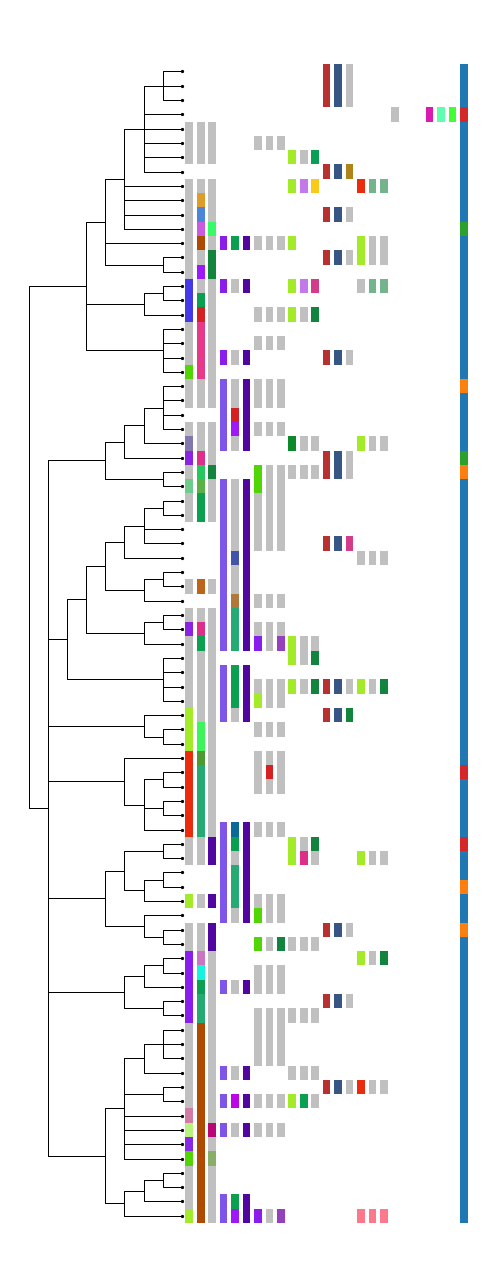

In [145]:
cas.pl.plot_matplotlib(cas_tree, orient='right', allele_table=merged, meta_data=['clusters'],figsize=(7.0, 18.0))

In [17]:
nj_solver = cas.solver.NeighborJoiningSolver(dissimilarity_function=cas.solver.dissimilarity.weighted_hamming_distance, add_root=True)
nj_solver.solve(cas_tree, collapse_mutationless_edges=True)

In [18]:
#cas.pl.plot_plotly(cas_tree, orient='right', allele_table=merged,meta_data=['clusters'])

filling in multiindex table:   0%|          | 0/433 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 168.85it/s]


(<Figure size 504x1512 with 1 Axes>, <AxesSubplot:>)

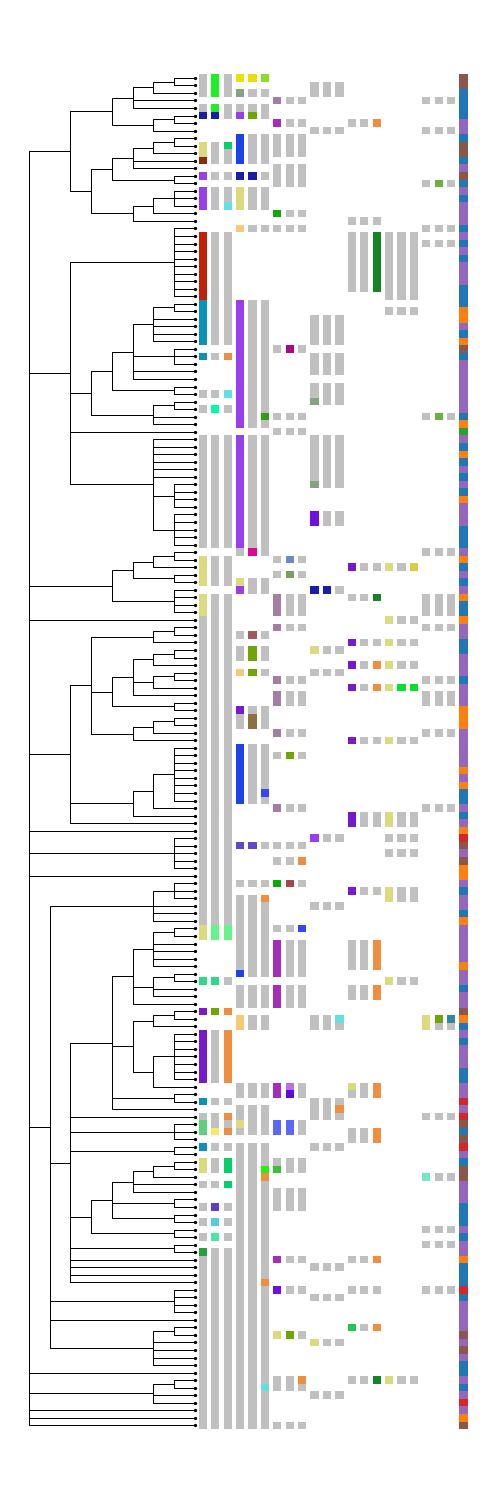

In [19]:
cas.pl.plot_matplotlib(cas_tree, orient='right', allele_table=merged, meta_data=['clusters'],figsize=(7.0, 18.0))

In [20]:
ilp_solver = cas.solver.ILPSolver(convergence_time_limit=500, maximum_potential_graph_layer_size=2000, weighted=False, seed=1234)

In [ ]:
hybrid_solver = cas.solver.HybridSolver(top_solver=vanilla_greedy, bottom_solver=ilp_solver, cell_cutoff=40, threads=32)
hybrid_solver.solve(cas_tree, logfile='/media/chang/HDD-6/chang/mg/mg_lib_20220324/P4_1/example_hybrid.log')

In [220]:
#cas.pl.plot_matplotlib(cas_tree, orient='right', allele_table=merged, meta_data=['clusters'],figsize=(7.0, 21.0))

In [ ]:
cas.pl.plot_plotly(cas_tree, orient='right', allele_table=merged,meta_data=['clusters'])